<a href="https://colab.research.google.com/github/claredavies/ArtificialIntelligience/blob/main/AIGroupAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [3]:
 !pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.4 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=9579720935d7ceeeb26ac884466208080345073b9fd5b225d358ad61a44b1be6
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Create Data

In [5]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
# input - quality, service 
# quality - 0 to 10
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
# service - 0 to 10
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
# tip (output) - 0 to 25%
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# output - amount to tip
# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

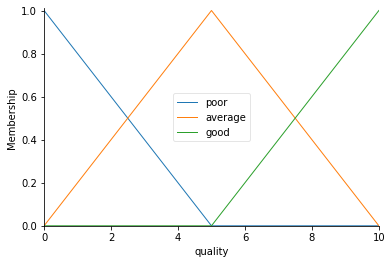

In [8]:
# You can see how these look with .view()
quality.view()

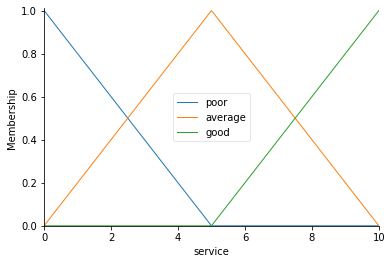

In [7]:
service.view()

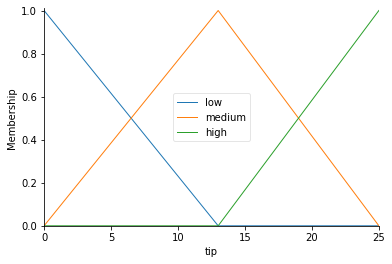

In [9]:
tip.view()

# Fuzzy Rules

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f79e0c23990>)

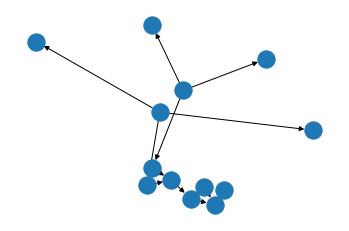

In [10]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view()

# Control System Creation

create a control system 

In [11]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In order to simulate this control system, we will create a ControlSystemSimulation. Think of this object representing our controller applied to a specific set of cirucmstances. For tipping, this might be tipping Sharon at the local brew-pub. We would create another ControlSystemSimulation when we’re trying to apply our tipping_ctrl for Travis at the cafe because the inputs would be different.

In [12]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

pecifying the inputs and calling the compute method. Suppose we rated the quality 6.5 out of 10 and the service 9.8 of 10.

In [13]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()

amount to tip:  19.847607361963192


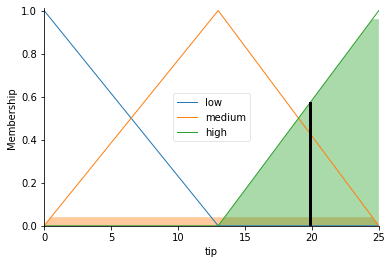

In [18]:
print("amount to tip:  " + str(tipping.output['tip']))
tip.view(sim=tipping)